# Association Rules Assignment
## book data

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
from sklearn.model_selection import GridSearchCV

In [113]:
data = pd.read_csv('book.csv')

### EDA and Visualization

In [114]:
data.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


Converting data to boolean type for improving performance

In [115]:
data = data.astype('bool')

In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   bool 
 1   YouthBks   2000 non-null   bool 
 2   CookBks    2000 non-null   bool 
 3   DoItYBks   2000 non-null   bool 
 4   RefBks     2000 non-null   bool 
 5   ArtBks     2000 non-null   bool 
 6   GeogBks    2000 non-null   bool 
 7   ItalCook   2000 non-null   bool 
 8   ItalAtlas  2000 non-null   bool 
 9   ItalArt    2000 non-null   bool 
 10  Florence   2000 non-null   bool 
dtypes: bool(11)
memory usage: 21.6 KB


In [117]:
data.shape

(2000, 11)

[Text(0, 0, '846'),
 Text(0, 0, '495'),
 Text(0, 0, '862'),
 Text(0, 0, '564'),
 Text(0, 0, '429'),
 Text(0, 0, '482'),
 Text(0, 0, '552'),
 Text(0, 0, '227'),
 Text(0, 0, '74'),
 Text(0, 0, '97'),
 Text(0, 0, '217')]

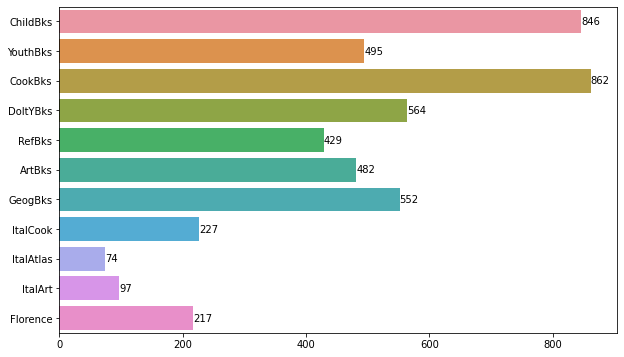

In [118]:
plt.figure(figsize=(10,6))
ax = sns.barplot(y=data.sum().index,x=data.sum().values)
ax.bar_label(ax.containers[0])

<AxesSubplot:>

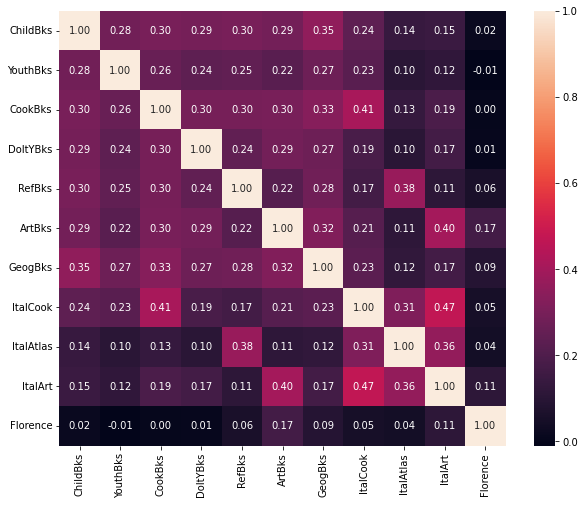

In [119]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,fmt='.2f')

### Apriori Algorithm

- the support value is used to identify frequent itemsets in the dataset
- confidence value is used to measure the strength of association between the items in the rules generated from these itemsets

Number of rules for each combination of parameters

In [120]:
param_grid = {'min_support':[0.01,0.03,0.05,0.1,0.15,0.2],
              'min_threshold':[0.5,0.6,0.7,0.8,0.9]}

In [121]:
def model(data,min_support=0.4,min_threshold=0.7):
    frequent_itemsets = apriori(data, min_support=min_support, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=min_threshold)
    return rules[rules.lift>1].shape[0]

In [122]:
grid = []
for support in param_grid['min_support']:
    for threshold in param_grid['min_threshold']:
        grid.append([support,threshold,model(data,support,threshold)])
grid = pd.DataFrame(grid,columns=['support','threshold','rules']).pivot('support','threshold','rules')

<AxesSubplot:xlabel='threshold', ylabel='support'>

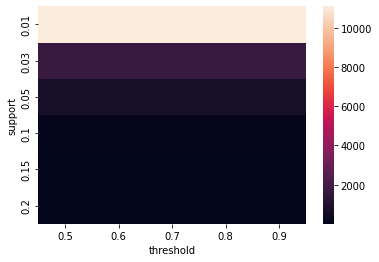

In [123]:
sns.heatmap(grid)

#### Association Rules with 10% support and 80% confidence

In [124]:
frequent_itemsets = apriori(data, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(ChildBks, YouthBks)"


In [125]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=0.8)
rules.sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
29,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406,1.000000
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf,0.641850
76,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628,0.669008
81,(GeogBks),"(ChildBks, ArtBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448,0.773887
86,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674,0.730966
...,...,...,...,...,...,...,...,...,...,...
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
12,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678,0.600225
13,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105,0.453858
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870


Text(0.5, 1.0, 'Association Rules')

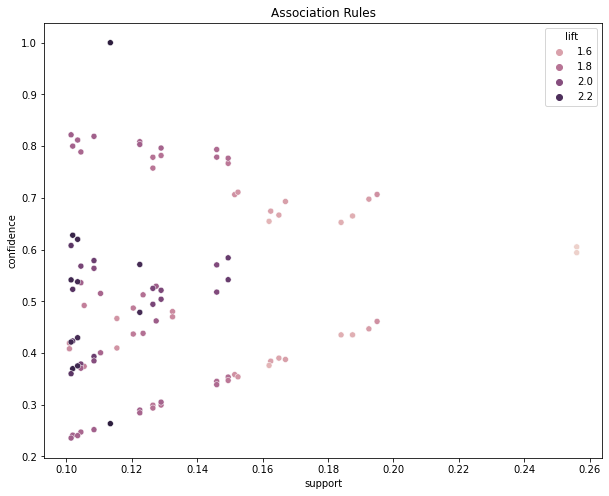

In [126]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=rules, x='support', y='confidence', hue='lift')
plt.title('Association Rules')

<AxesSubplot:xlabel='consequents', ylabel='antecedents'>

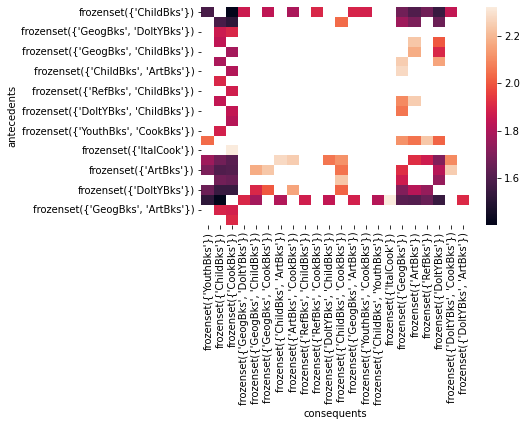

In [127]:
df = rules.pivot(index='antecedents',columns='consequents',values='lift')
sns.heatmap(df)

#### Association Rules with 20% support and 60% confidence

In [128]:
frequent_itemsets = apriori(data, min_support=0.2, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(ChildBks, CookBks)"


In [129]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=0.6)
rules.sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240,0.498856
1,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069,0.505870


Text(0.5, 1.0, 'Association Rules')

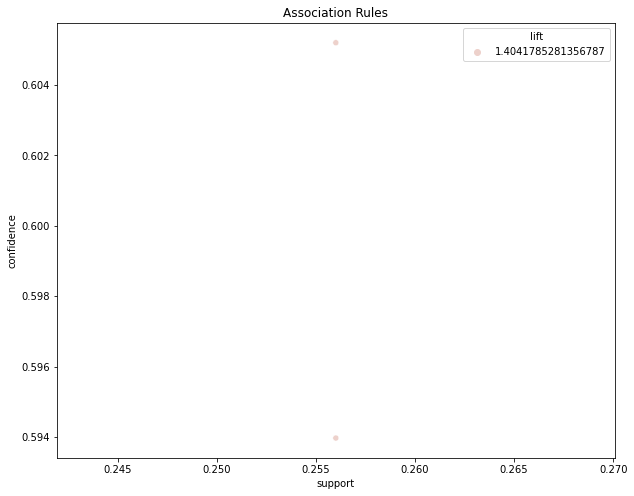

In [130]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=rules, x='support', y='confidence', hue='lift')
plt.title('Association Rules')

<AxesSubplot:xlabel='consequents', ylabel='antecedents'>

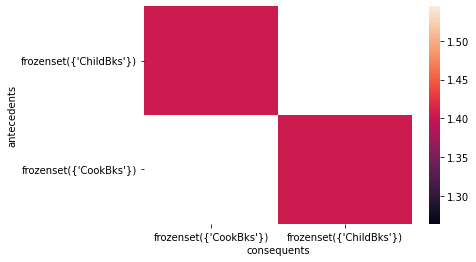

In [131]:
df = rules.pivot(index='antecedents',columns='consequents',values='lift')
sns.heatmap(df)